In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [ ]:
df = pd.read_csv('/content/dataset_processed.csv',delimiter=',', encoding='utf-8')
df.head()

,Sentiment,Text,Processed Text
0,Positive,নাটক টা সত্যি অনেক সুন্দর লাগছে,নাটক টা সত্যি অনেক সুন্দর লাগছে
1,Positive,সুন্দর হইছে মম্মা।,সুন্দর হইছে মম্মা।
2,Negative,সেরা ফালতু নাটক ১টা,সেরা ফালতু নাটক ১টা
3,Positive,গানটা অছাম,গানটা অছাম
4,Negative,বোকা নির্বোদ,বোকা নির্বোদ


In [ ]:
df.shape

(11807, 3)

In [ ]:
df.info

<bound method DataFrame.info of       Sentiment                                               Text  \
0      Positive                    নাটক টা সত্যি অনেক সুন্দর লাগছে   
1      Positive                                 সুন্দর হইছে মম্মা।   
2      Negative                                সেরা ফালতু নাটক ১টা   
3      Positive                                         গানটা অছাম   
4      Negative                                      বোকা  নির্বোদ   
...         ...                                                ...   
11802  Positive                                            অসাধারন   
11803  Positive  অসাধারণ একটা নাটক ভাই বৌউ পেলে বাড়ির বোন কাজের...   
11804  Positive  রিয়াজ ভাই তুমি ইভানাকে নিয়ে মুভি করো খুব মজা হ...   
11805  Positive  অসাধারণ অভিনয় আফরান নিশো ভাই এর। আর মেহজাবীন ত...   
11806  Negative                                          বাজে নাটক   

                                          Processed Text  
0                        নাটক টা সত্যি অনেক সুন্দর লাগছে  
1        

In [ ]:
df.isnull().sum()

Sentiment         0
Text              0
Processed Text    0
dtype: int64

In [ ]:
df.drop(['Text'],axis=1,inplace=True)

In [ ]:
df.columns = ['Sentiment', 'Processed Text']

In [ ]:
df['Sentiment'].value_counts()

Positive    8500
Negative    3307
Name: Sentiment, dtype: int64

In [ ]:
final_corpus = df['Processed Text'].tolist()

In [ ]:
data_eda = pd.DataFrame()
data_eda['Processed text'] = final_corpus
data_eda['Sentiment'] = df['Sentiment'].values
data_eda.head()

,Processed text,Sentiment
0,নাটক টা সত্যি অনেক সুন্দর লাগছে,Positive
1,সুন্দর হইছে মম্মা।,Positive
2,সেরা ফালতু নাটক ১টা,Negative
3,গানটা অছাম,Positive
4,বোকা নির্বোদ,Negative


In [ ]:
positive = data_eda[data_eda['Sentiment'] == 4]
positive_list = positive['Processed text'].tolist()
negative = data_eda[data_eda['Sentiment'] == 0]
negative_list = negative['Processed text'].tolist()

In [ ]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])

In [ ]:
data_cleaned = pd.DataFrame()
data_cleaned ['text'] = df['Processed Text'].values
data_cleaned['sentiment'] = df['Sentiment'].values
data_cleaned

,text,sentiment
0,নাটক টা সত্যি অনেক সুন্দর লাগছে,Positive
1,সুন্দর হইছে মম্মা।,Positive
2,সেরা ফালতু নাটক ১টা,Negative
3,গানটা অছাম,Positive
4,বোকা নির্বোদ,Negative
...,...,...
11802,অসাধারন,Positive
11803,অসাধারণ একটা নাটক ভাই বৌউ পেলে বাড়ির বোন কাজের...,Positive
11804,রিয়াজ ভাই তুমি ইভানাকে নিয়ে মুভি করো খুব মজা হ...,Positive
11805,অসাধারণ অভিনয় আফরান নিশো ভাই এর। আর মেহজাবীন ত...,Positive


In [ ]:
X = data_cleaned['text']
y = data_cleaned['sentiment']

In [ ]:
import numpy
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense , Dropout , Activation
from keras.layers import LSTM , Embedding
from keras.layers import MaxPooling1D , GlobalMaxPooling1D,Conv1D , Flatten

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
Xt = tfid.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.2, random_state= 42)

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.72      0.74       687
    Positive       0.89      0.91      0.90      1675

    accuracy                           0.85      2362
   macro avg       0.82      0.81      0.82      2362
weighted avg       0.85      0.85      0.85      2362



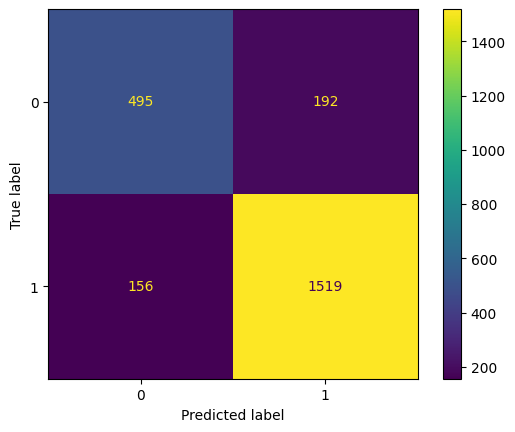

In [ ]:
#Visualizing Model Results
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
t1.plot()

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

ValueError: ignored